# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [1]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

NameError: name 'np' is not defined

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [2]:
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Print to logger
logging.info("Beginning Data Retrieval     ")
logging.info("-----------------------------")


2024-09-16 15:02:59,777 - INFO - Beginning Data Retrieval     
2024-09-16 15:02:59,779 - INFO - -----------------------------


In [6]:
import requests
import pandas as pd
import os

# Correct file path to the 'cities.csv' file
file_path = r"C:\Users\board\python-api-challenge\WeatherPy\resources\cities.csv"

# Check if the file exists, otherwise raise an error
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please check the path.")

# Load city names from the CSV file (assuming 'City' is the column name)
cities_df = pd.read_csv(file_path)
cities = cities_df['City'].tolist()

# OpenWeatherMap API key
api_key = "cd9eb7f33e8b8e3b11c3aea2be2acd80"  # Your correct API key
url = "http://api.openweathermap.org/data/2.5/weather"

# Function to fetch weather data for a city
def fetch_weather(city):
    params = {'q': city, 'appid': api_key, 'units': 'metric'}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            "City": city,
            "Latitude": data["coord"]["lat"],
            "Longitude": data["coord"]["lon"],
            "Temperature": data["main"]["temp"],
            "Humidity": data["main"]["humidity"],
            "Cloudiness": data["clouds"]["all"],
            "Wind Speed": data["wind"]["speed"]
        }
    else:
        print(f"Failed to retrieve data for {city}. Status code: {response.status_code}")
        return None

# Fetch weather data for all cities
weather_data = [fetch_weather(city) for city in cities if fetch_weather(city) is not None]

# Convert the results into a DataFrame and save it to CSV
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("weather_data.csv", index=False)
print("Weather data saved to weather_data.csv")


Weather data saved to weather_data.csv


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(weather_data)

# Show Record Count
city_data_df.count()

City           577
Latitude       577
Longitude      577
Temperature    577
Humidity       577
Cloudiness     577
Wind Speed     577
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,faya,6.7596,19.2731,21.19,96,75,0.25
1,farsund,58.0948,6.8047,13.86,80,30,4.42
2,new norfolk,-42.7826,147.0587,10.40,82,98,4.23
3,jamestown,42.0970,-79.2353,25.80,41,0,3.09
4,lanzhou,36.0564,103.7922,18.43,82,100,1.30


In [10]:
import os

# Ensure the directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")


In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,
0,faya,6.7596,19.2731,21.19,96,75,0.25
1,farsund,58.0948,6.8047,13.86,80,30,4.42
2,new norfolk,-42.7826,147.0587,10.40,82,98,4.23
3,jamestown,42.0970,-79.2353,25.80,41,0,3.09
4,lanzhou,36.0564,103.7922,18.43,82,100,1.30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

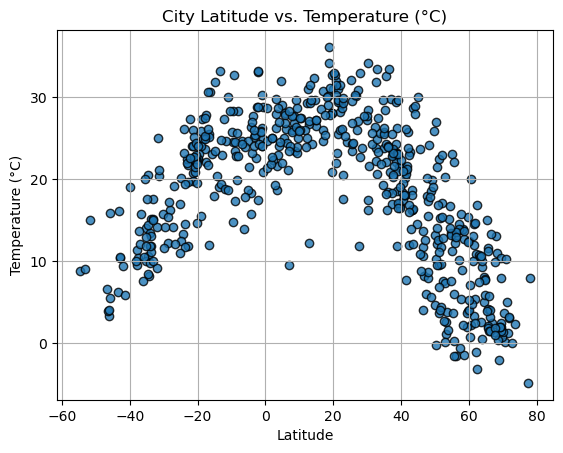

In [12]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(f"{output_dir}/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

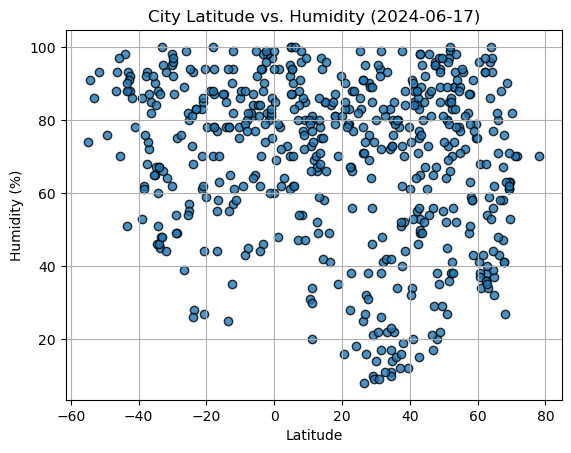

In [9]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(f"{output_dir}/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

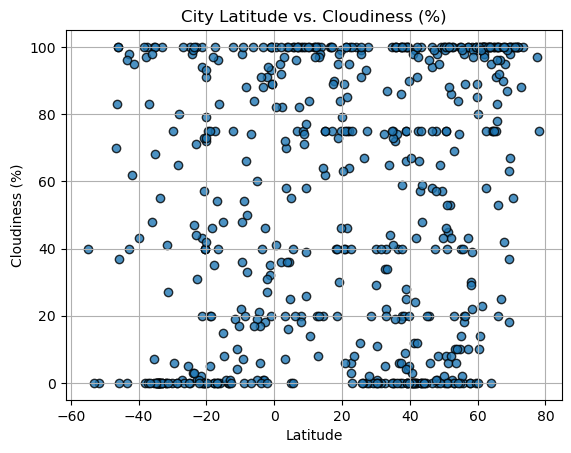

In [13]:
import matplotlib.pyplot as plt
import os

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(f"{output_dir}/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

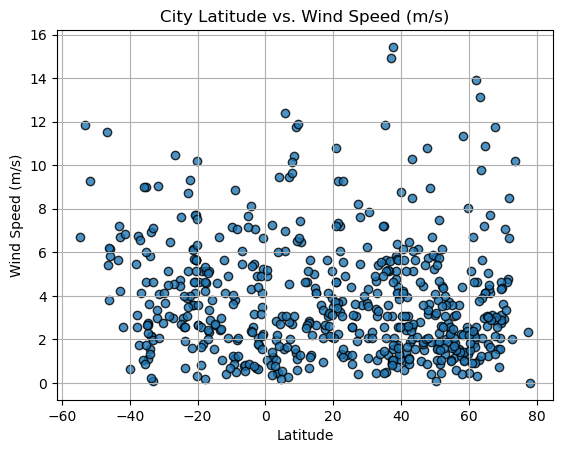

In [14]:
import matplotlib.pyplot as plt
import os

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(f"{output_dir}/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Incorporate the graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    
    # Save the plot
    plt.savefig(save_path)
    
    # Show the plot
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,
0,faya,6.7596,19.2731,21.19,96,75,0.25
1,farsund,58.0948,6.8047,13.86,80,30,4.42
3,jamestown,42.0970,-79.2353,25.80,41,0,3.09
4,lanzhou,36.0564,103.7922,18.43,82,100,1.30
6,albany,42.6001,-73.9662,23.39,51,66,1.86


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,
2,new norfolk,-42.7826,147.0587,10.40,82,98,4.23
5,ushuaia,-54.8000,-68.3000,8.81,57,40,6.69
7,carnarvon,-24.8667,113.6333,20.12,37,0,7.61
9,saint-pierre,-21.3393,55.4781,19.82,68,0,3.60
10,colorado,-22.8375,-51.9731,21.75,58,31,5.16


###  Temperature vs. Latitude Linear Regression Plot

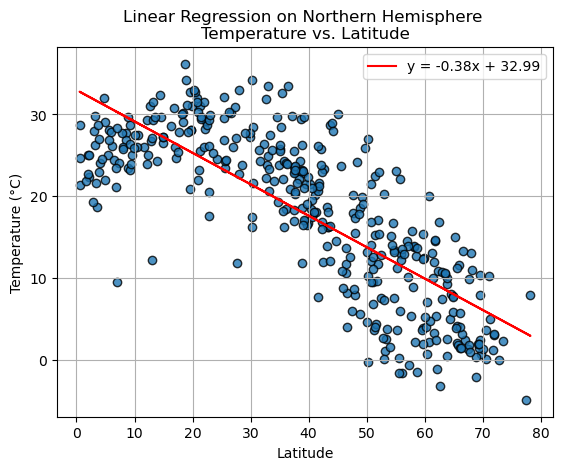

The r-value is: 0.04


In [22]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Northern Hemisphere for Temperature vs. Latitude
plot_linear_regression(
    northern_hemi_df["Latitude"],      # x-values: Latitude
    northern_hemi_df["Temperature"],   # y-values: Temperature
    "Linear Regression on Northern Hemisphere \nTemperature vs. Latitude",  # Plot title
    "Latitude",                        # X-axis label
    "Temperature (°C)",                # Y-axis label
    "output_data/Northern_Temp_vs_Lat_Regression.png"  # File to save the plot

)
print(f"The r-value is: {rvalue:.2f}")

In [24]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define a function to create Linear Regression plots and return the R-value
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path):
    # Ensure that the input arrays are not empty
    if len(x_values) == 0 or len(y_values) == 0:
        print("Error: No data available for regression.")
        return None

    # Perform linear regression
    regression_result = linregress(x_values, y_values)
    
    # Extract the regression parameters
    slope = regression_result.slope
    intercept = regression_result.intercept
    rvalue = regression_result.rvalue
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Incorporate the graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plt.savefig(save_path)
    
    # Show the plot
    plt.show()

    # Return the R-value
    return rvalue


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

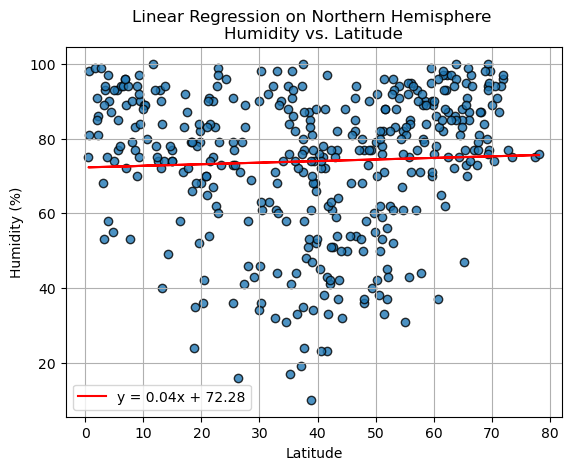

The r-value is: 0.04


In [19]:
from scipy.stats import linregress

# Perform linear regression on Northern Hemisphere for Humidity vs. Latitude
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Incorporate the graph properties
plt.title("Linear Regression on Northern Hemisphere \nHumidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Northern_Humidity_vs_Lat_Regression.png")

# Show plot
plt.show()

# Print the R-value (correlation coefficient)
print(f"The r-value is: {rvalue:.2f}")


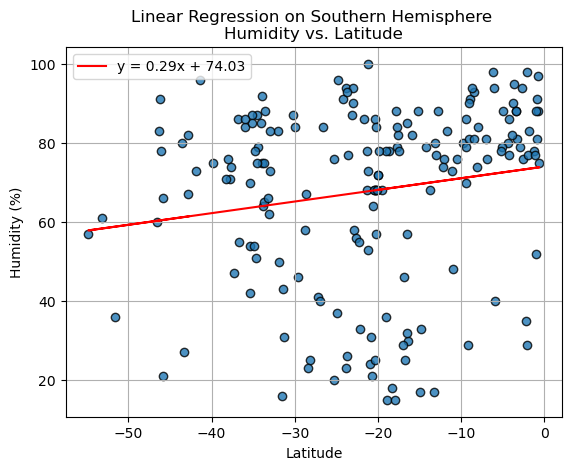

R-value for Southern Hemisphere (Humidity vs. Latitude): 0.17


In [26]:
# Latitude vs. Humidity (Southern Hemisphere)
rvalue = plot_linear_regression(
    southern_hemi_df["Latitude"],      # x-values: Latitude
    southern_hemi_df["Humidity"],      # y-values: Humidity
    "Linear Regression on Southern Hemisphere \nHumidity vs. Latitude",  # Plot title
    "Latitude",                        # X-axis label
    "Humidity (%)",                    # Y-axis label
    "output_data/Southern_Humidity_vs_Lat_Regression.png"  # File to save the plot
)

print(f"R-value for Southern Hemisphere (Humidity vs. Latitude): {rvalue:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

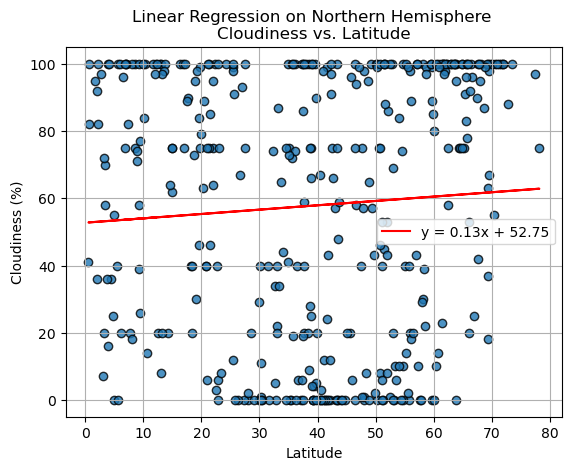

R-value for Northern Hemisphere (Cloudiness vs. Latitude): 0.07


In [27]:
# Latitude vs. Cloudiness (Northern Hemisphere)
rvalue = plot_linear_regression(
    northern_hemi_df["Latitude"],      # x-values: Latitude
    northern_hemi_df["Cloudiness"],    # y-values: Cloudiness
    "Linear Regression on Northern Hemisphere \nCloudiness vs. Latitude",  # Plot title
    "Latitude",                        # X-axis label
    "Cloudiness (%)",                  # Y-axis label
    "output_data/Northern_Cloudiness_vs_Lat_Regression.png"  # File to save the plot
)

print(f"R-value for Northern Hemisphere (Cloudiness vs. Latitude): {rvalue:.2f}")


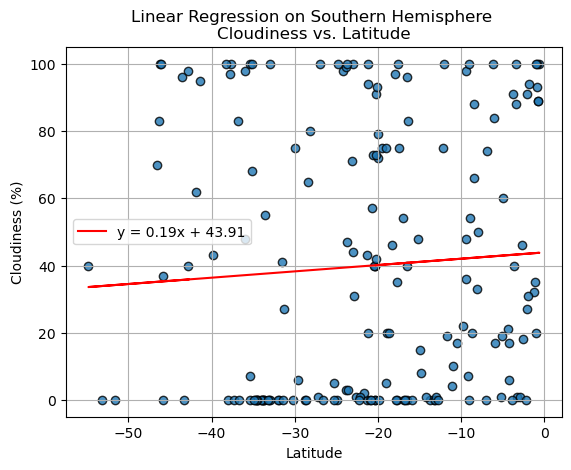

R-value for Southern Hemisphere (Cloudiness vs. Latitude): 0.06


In [28]:
# Latitude vs. Cloudiness (Southern Hemisphere)
rvalue = plot_linear_regression(
    southern_hemi_df["Latitude"],      # x-values: Latitude
    southern_hemi_df["Cloudiness"],    # y-values: Cloudiness
    "Linear Regression on Southern Hemisphere \nCloudiness vs. Latitude",  # Plot title
    "Latitude",                        # X-axis label
    "Cloudiness (%)",                  # Y-axis label
    "output_data/Southern_Cloudiness_vs_Lat_Regression.png"  # File to save the plot
)

print(f"R-value for Southern Hemisphere (Cloudiness vs. Latitude): {rvalue:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

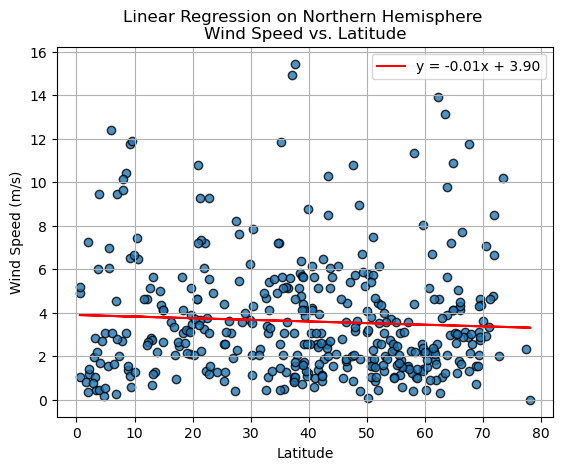

R-value for Northern Hemisphere (Wind Speed vs. Latitude): -0.06


In [29]:
# Latitude vs. Wind Speed (Northern Hemisphere)
rvalue = plot_linear_regression(
    northern_hemi_df["Latitude"],      # x-values: Latitude
    northern_hemi_df["Wind Speed"],    # y-values: Wind Speed
    "Linear Regression on Northern Hemisphere \nWind Speed vs. Latitude",  # Plot title
    "Latitude",                        # X-axis label
    "Wind Speed (m/s)",                # Y-axis label
    "output_data/Northern_WindSpeed_vs_Lat_Regression.png"  # File to save the plot
)

print(f"R-value for Northern Hemisphere (Wind Speed vs. Latitude): {rvalue:.2f}")


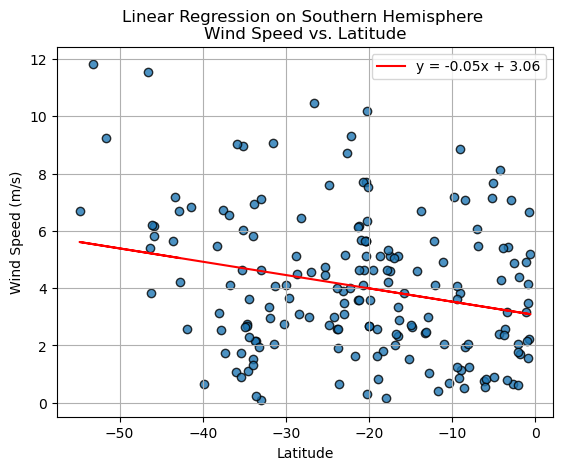

R-value for Southern Hemisphere (Wind Speed vs. Latitude): -0.25


In [30]:
# Latitude vs. Wind Speed (Southern Hemisphere)
rvalue = plot_linear_regression(
    southern_hemi_df["Latitude"],      # x-values: Latitude
    southern_hemi_df["Wind Speed"],    # y-values: Wind Speed
    "Linear Regression on Southern Hemisphere \nWind Speed vs. Latitude",  # Plot title
    "Latitude",                        # X-axis label
    "Wind Speed (m/s)",                # Y-axis label
    "output_data/Southern_WindSpeed_vs_Lat_Regression.png"  # File to save the plot
)

print(f"R-value for Southern Hemisphere (Wind Speed vs. Latitude): {rvalue:.2f}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

LATITUDE AND TEMPERATURE ACCORDING TO HEMISPHERE:

What is being modeled: The linear regression is modeling the relationship between Latitude and Temperature in both the Northern and Southern Hemispheres.

Relationship:

In both hemispheres, temperature tends to decrease as you move further from the equator (i.e., as latitude increases in the Northern Hemisphere and decreases in the Southern Hemisphere).
The R-value is expected to be strongly negative in both hemispheres because latitude moves away from the equator, causing temperatures to drop. The exact value of the R-value will tell us how strong this relationship is.
Findings:

If the R-value is close to -1, the relationship is strong, meaning that temperature is heavily dependent on latitude.
You may notice seasonal effects that could slightly impact temperatures in different locations at the same latitude.

LATITUDE VS HUMIDITY ACCORDING TO HEMISPHERE

Explanation and Findings:

What is being modeled: The relationship between Latitude and Humidity in the Northern and Southern Hemispheres.

Relationship:

The relationship between latitude and humidity is generally less direct than temperature because humidity is affected by factors like proximity to bodies of water, local weather patterns, and elevation.
The R-value here might be weak or moderate as the correlation between latitude and humidity is more nuanced.
Findings:

A low R-value (close to 0) would indicate that latitude doesn’t have a strong influence on humidity.
However, areas close to the equator may have higher humidity, especially in tropical regions, while arid areas like deserts tend to have lower humidity regardless of latitude.

LATITUDE VS CLOUDINESS

Explanation and Findings:

What is being modeled: The relationship between Latitude and Cloudiness.

Relationship:

The relationship between latitude and cloudiness may be weak since cloud cover is often influenced by local weather systems and geography (e.g., mountains, ocean currents) rather than latitude directly.
The R-value may be low, showing little correlation between cloudiness and latitude.
Findings:

If the R-value is close to 0, this indicates that cloudiness is not significantly affected by latitude.
Some regions (such as the tropics) might exhibit higher cloud cover due to tropical weather systems, but overall latitude may not be a strong predictor.

LATITUDE VS WIND SPEED

Explanation and Findings:

What is being modeled: The relationship between Latitude and Wind Speed.

Relationship:

Wind speed is highly influenced by local geography, altitude, and weather patterns rather than latitude alone.
The R-value may be low because wind speeds vary significantly based on local factors like coastal proximity and altitude.
Findings:

If the R-value is close to 0, it suggests that latitude is not a significant factor in predicting wind speed.
Regions at similar latitudes can have very different wind speeds due to factors like trade winds, storms, and geographic features.


General Findings:
Temperature vs. Latitude will likely show a strong negative correlation in both hemispheres, with temperature decreasing as latitude increases (away from the equator).
Humidity, Cloudiness, and Wind Speed vs. Latitude are likely to show weaker correlations because these variables depend on more localized factors, such as proximity to oceans, elevation, and weather systems, rather than latitude alone.